In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv
/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv


# Data Cleaning and Transformation

## Importing necessary libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
pd.set_option("display.max_columns", None)

## Loading the dataset

In [4]:
fifa = pd.read_csv(r"/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv", low_memory=False)

## Understanding data structure

In [5]:
fifa.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [6]:
# Checking the dimension of fifa df
rows = fifa.shape[0]
columns = fifa.shape[1]
print(f"Rows: {rows}\nColumns: {columns}")

Rows: 18979
Columns: 77


In [7]:
fifa.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,15.178151,16.565892,55.879046,14.889981,14.638743,14.596277,9.072114,14.062285,50.732390,13.308747,11.844870,15.804223,12.488672,19.300534,64.595613,17.140414,20.698078,19.428701,13.708574,15.655999,12.07911,61.219472,20.139324,21.367690,20.922087,84.665579,17.554194,16.816305,16.491103,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.00000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.00000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.

In [8]:
pd.set_option("display.max_rows", None)
fifa.info()
pd.set_option("display.max_rows", 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

## Checking NA values

In [9]:
# Checking columns with null values
null_cols = fifa.columns[fifa.isna().sum()>0]
for i in null_cols: 
    print(f'{i}: {fifa[i].isna().sum()}')

Loan Date End: 17966
Hits: 2595


In [10]:
print(f"Loan Date End:  non-Null values\n{fifa['Loan Date End'].notna().sum()}")
print(f"Contract: On loan \n{fifa[fifa['Contract'].str.contains('Loan')]['Contract'].count()}")

Loan Date End:  non-Null values
1013
Contract: On loan 
1013


In [11]:
print(fifa[fifa["Contract"].str.contains("Loan")==True][["Contract", "Loan Date End"]])

                   Contract Loan Date End
205    Jun 30, 2021 On Loan  Jun 30, 2021
248    Jun 30, 2021 On Loan  Jun 30, 2021
254    Jun 30, 2021 On Loan  Jun 30, 2021
302    Jun 30, 2021 On Loan  Jun 30, 2021
306    Jun 30, 2021 On Loan  Jun 30, 2021
...                     ...           ...
18472  Aug 31, 2021 On Loan  Aug 31, 2021
18571  Jun 30, 2021 On Loan  Jun 30, 2021
18600  Dec 31, 2020 On Loan  Dec 31, 2020
18622  Dec 31, 2020 On Loan  Dec 31, 2020
18680  Dec 31, 2020 On Loan  Dec 31, 2020

[1013 rows x 2 columns]


We conclude here that only those that have '*on Loan'* Contract have Loan Date End <br>
So we will set Null Values of **Loan Date End** to **0**

In [12]:
# Fill na values of Loan Date End with 0
fifa["Loan Date End"] = fifa["Loan Date End"].fillna(0)

In [13]:
# Separating numerical and object data types
fifa_num = fifa.select_dtypes("number")
fifa_obj = fifa.select_dtypes("object")

In [14]:
fifa_num.head()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
0,158023,33,93,93,93,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,85,92,91,95,38,65
1,20801,35,92,92,92,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,89,93,81,89,35,77
2,200389,27,91,93,91,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,87,92,78,90,52,90
3,192985,29,91,91,91,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,76,86,93,88,64,78
4,190871,28,91,91,91,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,91,85,86,94,36,59


In [15]:
fifa_obj.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,RW,"Jul 1, 2004",0,€103.5M,€560K,€138.4M,4 ★,4★,Medium,Low,5 ★,771
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,ST,"Jul 10, 2018",0,€63M,€220K,€75.9M,4 ★,5★,High,Low,5 ★,562
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,GK,"Jul 16, 2014",0,€120M,€125K,€159.4M,3 ★,1★,Medium,Medium,3 ★,150
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,CAM,"Aug 30, 2015",0,€129M,€370K,€161M,5 ★,4★,High,High,4 ★,207
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,LW,"Aug 3, 2017",0,€132M,€270K,€166.5M,5 ★,5★,High,Medium,5 ★,595


In [16]:
# Installing pyspellchecker
!pip install pyspellchecker

# Import pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 55.6 MB/s eta 0:00:00


In [17]:
fifa_obj["Contract"].unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [18]:
def contract_split(value):
    """
    Splits a contract value into its components: start date, end date, and contract type.

    Args:
        value (str): The input contract value.

    Returns:
        str: A semicolon-separated string containing start date, end date, and contract type.
    """
    start, end, c_type = "","",""
    if "~" in value:                      # For contract type players
        start, end = value.split(" ~ ")
        c_type = "Contract"
    elif "On" in value:                   # For Loan type players
        index = value.find("O")
        start = value[index-5:index-1]
        c_type = value[index-1:]
    else:                                 # For Free players
        c_type = value
    return start + ";" + end + ";" + c_type
        
        
        
samples = ['2007 ~ 2020',
       '2003 ~ 2021', 'Jun 23, 2021 On Loan', 'Jan 3, 2021 On Loan',
       'Nov 27, 2021 On Loan', '2002 ~ 2021', 'Jan 17, 2021 On Loan',
       'Jun 30, 2023 On Loan', '1998 ~ 2021', '2003 ~ 2022',
       '2007 ~ 2023', 'Jul 31, 2021 On Loan', 'Nov 22, 2020 On Loan',
       'May 31, 2022 On Loan', '2006 ~ 2020', 'Dec 30, 2020 On Loan',
       '2007 ~ 2025', 'Jan 4, 2021 On Loan', 'Nov 30, 2020 On Loan', 'Free']

for i in samples:
    contract = contract_split(i)
    print(contract)

2007;2020;Contract
2003;2021;Contract
2021;; On Loan
2021;; On Loan
2021;; On Loan
2002;2021;Contract
2021;; On Loan
2023;; On Loan
1998;2021;Contract
2003;2022;Contract
2007;2023;Contract
2021;; On Loan
2020;; On Loan
2022;; On Loan
2006;2020;Contract
2020;; On Loan
2007;2025;Contract
2021;; On Loan
2020;; On Loan
;;Free


In [19]:
# Apply the function
fifa_obj["Contract"] = fifa_obj["Contract"].apply(contract_split)

In [20]:
# Splitting the contract into start, end, and contract_type columns
fifa_obj[["start_contract", "end_contract", "contract_type"]] = fifa_obj["Contract"].str.split(";", expand=True, n=2)
# Removing the Contract column
fifa_obj = fifa_obj.drop("Contract", axis=1)

In [21]:
# Find the empty strings
print(fifa_obj["start_contract"].unique())
print(fifa_obj["end_contract"].unique())
print(fifa_obj["contract_type"].unique())

['2004' '2018' '2014' '2015' '2017' '2016' '2013' '2011' '2009' '2005'
 '2010' '2012' '2019' '2020' '2008' '2007' '2021' '' '2002' '2022' '2006'
 '2003' '2023' '1998']
['2021' '2022' '2023' '2024' '2025' '2026' '' '2028' '2020' '2027']
['Contract' ' On Loan' 'Free']


In [22]:
# Change the empty strings  of end_contract to Nan values (So that we can use combine first function
# and combine here the values on Loan Date End)
fifa_obj["end_contract"] = fifa_obj["end_contract"].replace("", np.nan)
fifa_obj["start_contract"] = fifa_obj["start_contract"].replace("", 0)

We're adding the *year* on **Loan Date End** column to **end_contract** <br>
But first we have to get the year only for the Loan Date End

In [23]:
# Function to get the year
import re
def year(value):
    '''
    Extracts the first occurrence of a four-digit number from a string, which is presumed to be a year.

    Parameters:
    value (str or int): The value from which the year is to be extracted. If it's a string, it will search for the year pattern.

    Returns:
    str: The first four-digit number found in the input string if the input is a string and contains a four-digit number.
    int/str: The original value if the input is not a string or does not contain a four-digit number.
    
    Raises:
    Exception: Any exception encountered during processing will be printed.
    '''
    try: 
        if isinstance(value, str): 
            match = re.search(r"\d{4}", value)
            if match:
                return match.group()
        else:
            return value
    except Exception as e:
        print(e)
        

# Test the function
dates = ["Jun 30, 2021", "Jun 30, 2021", "Jun 30, 2021", "Jun 30, 2021", "Jun 30, 2021"]

for date in dates:
    years = year(date)
    print(years)

2021
2021
2021
2021
2021


In [24]:
# Applying the function year to Loan Date End
fifa_obj["Loan Date End"] = fifa_obj["Loan Date End"].apply(year)

In [25]:
# Check the changes
# We're using zeroes here as placeholder for missing values of Loan Date End and start_contract
# We require that the end_contract missing values in np.nan to make sure combine_first function works
print(fifa_obj["Loan Date End"].unique()) 
print(fifa_obj["start_contract"].unique())
print(fifa_obj["end_contract"].unique())

[0 '2021' '2020' '2022' '2023']
['2004' '2018' '2014' '2015' '2017' '2016' '2013' '2011' '2009' '2005'
 '2010' '2012' '2019' '2020' '2008' '2007' '2021' 0 '2002' '2022' '2006'
 '2003' '2023' '1998']
['2021' '2022' '2023' '2024' '2025' '2026' nan '2028' '2020' '2027']


In [26]:
# Adding the values from Loan Date End to end contract to fill the Nan values for On Loan contract_type
fifa_obj["end_contract"] = fifa_obj["end_contract"].combine_first(fifa_obj["Loan Date End"])

In [27]:
# Checking if works
fifa_obj[["start_contract", "end_contract", "contract_type"]].sample(10)

,start_contract,end_contract,contract_type
14573,2020,2024,Contract
1659,2019,2024,Contract
1202,2019,2023,Contract
10379,2018,2020,Contract
13618,2017,2024,Contract
10882,2020,2022,Contract
7548,2016,2023,Contract
3680,2020,2022,Contract
11114,2021,2021,On Loan
18585,2019,2021,Contract


In [28]:
# Remove trailing and leading whitespaces
fifa_obj["Club"] = fifa_obj["Club"].str.strip()

In [29]:
# Removing the unit to change to integer type
fifa_obj["Height"] = fifa_obj["Height"].str.replace("cm", "")
fifa_obj["Weight"] = fifa_obj["Weight"].str.replace("kg", "")

In [30]:
# Rename Height and Weight and add the units of measurement
fifa_obj.rename(columns={"Height": "height_cm", "Weight": "weight_kg"}, inplace=True)

In [31]:
# Height and weight converter
def lbs_to_kg(weight):
    '''
    Converts a weight from pounds to kilograms.

    Parameters:
    weight (str): The weight in pounds, represented as a string with 'lbs' suffix.

    Returns:
    float: The weight converted to kilograms, rounded to the nearest whole number if 'lbs' is in the input string.
    float: The original weight as a float if 'lbs' is not in the input string.
    
    Raises:
    Exception: Any exception encountered during processing will be printed.
    '''
    try: 
        if "lbs" in weight:
            return round(float(weight.replace("lbs", "")) * 0.453592, 0)
        else: 
            return float(weight)
    except Exception as e:
        print(e)
    
    
def ft_to_cm(height):
    '''
    Converts a height from feet and inches to centimeters.

    Parameters:
    height (str): The height in feet and inches, represented as a string with a single quote (') for feet and double quote (") for inches.

    Returns:
    float: The height converted to centimeters, rounded to the nearest whole number if the input string contains feet and inches.
    float: The original height as a float if the input string does not contain feet and inches.
    '''
    try:
        if "\'" in height: 
            height = height.replace("\'", ".")
            height = height.replace('"', "")
            return round(float(height)*30.48, 0)
        else:
            return float(height)
    except Exception as e:
        print(e)

In [32]:
# Look for inconsistent format
print(fifa_obj["height_cm"].unique())
print(fifa_obj["weight_kg"].unique())

['170' '187' '188' '181' '175' '184' '191' '178' '193' '185' '199' '173'
 '168' '176' '177' '183' '180' '189' '179' '195' '172' '182' '186' '192'
 '165' '194' '167' '196' '163' '190' '174' '169' '171' '197' '200' '166'
 '6\'2"' '164' '198' '6\'3"' '6\'5"' '5\'11"' '6\'4"' '6\'1"' '6\'0"'
 '5\'10"' '5\'9"' '5\'6"' '5\'7"' '5\'4"' '201' '158' '162' '161' '160'
 '203' '157' '156' '202' '159' '206' '155']
['72' '83' '87' '70' '68' '80' '71' '91' '73' '85' '92' '69' '84' '96'
 '81' '82' '75' '86' '89' '74' '76' '64' '78' '90' '66' '60' '94' '79'
 '67' '65' '59' '61' '93' '88' '97' '77' '62' '63' '95' '100' '58'
 '183lbs' '179lbs' '172lbs' '196lbs' '176lbs' '185lbs' '170lbs' '203lbs'
 '168lbs' '161lbs' '146lbs' '130lbs' '190lbs' '174lbs' '148lbs' '165lbs'
 '159lbs' '192lbs' '181lbs' '139lbs' '154lbs' '157lbs' '163lbs' '98' '103'
 '99' '102' '56' '101' '57' '55' '104' '107' '110' '53' '50' '54' '52']


In [33]:
# Applying the functions
fifa_obj["weight_kg"] = fifa_obj["weight_kg"].apply(lbs_to_kg)
fifa_obj["height_cm"] = fifa_obj["height_cm"].apply(ft_to_cm)

In [34]:
# Checking the changes
print(f"Weight: \n{fifa_obj['weight_kg'].unique()}") 
print()
print(f"Height: \n{fifa_obj['height_cm'].unique()}")

Weight: 
[ 72.  83.  87.  70.  68.  80.  71.  91.  73.  85.  92.  69.  84.  96.
  81.  82.  75.  86.  89.  74.  76.  64.  78.  90.  66.  60.  94.  79.
  67.  65.  59.  61.  93.  88.  97.  77.  62.  63.  95. 100.  58.  98.
 103.  99. 102.  56. 101.  57.  55. 104. 107. 110.  53.  50.  54.  52.]

Height: 
[170. 187. 188. 181. 175. 184. 191. 178. 193. 185. 199. 173. 168. 176.
 177. 183. 180. 189. 179. 195. 172. 182. 186. 192. 165. 194. 167. 196.
 163. 190. 174. 169. 171. 197. 200. 166. 164. 198. 156. 155. 201. 158.
 162. 161. 160. 203. 157. 202. 159. 206.]


In [35]:
fifa_obj.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Positions,height_cm,weight_kg,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits,start_contract,end_contract,contract_type
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,FC Barcelona,"RW, ST, CF",170.0,72.0,Left,RW,"Jul 1, 2004",0,€103.5M,€560K,€138.4M,4 ★,4★,Medium,Low,5 ★,771,2004,2021,Contract
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,Juventus,"ST, LW",187.0,83.0,Right,ST,"Jul 10, 2018",0,€63M,€220K,€75.9M,4 ★,5★,High,Low,5 ★,562,2018,2022,Contract
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,Atlético Madrid,GK,188.0,87.0,Right,GK,"Jul 16, 2014",0,€120M,€125K,€159.4M,3 ★,1★,Medium,Medium,3 ★,150,2014,2023,Contract
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,Manchester City,"CAM, CM",181.0,70.0,Right,CAM,"Aug 30, 2015",0,€129M,€370K,€161M,5 ★,4★,High,High,4 ★,207,2015,2023,Contract
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,Paris Saint-Germain,"LW, CAM",175.0,68.0,Right,LW,"Aug 3, 2017",0,€132M,€270K,€166.5M,5 ★,5★,High,Medium,5 ★,595,2017,2022,Contract


In [36]:
# Checking if the numbers of unique values are within the range of values 
# for both the Teams and Nationality columns
teams = fifa_obj["Club"].nunique()
print(f"Teams: {teams}")

nationality = fifa_obj["Nationality"].nunique()
print(f"Nationality: {nationality}")

Teams: 682
Nationality: 164


In [37]:
# installing pycountry
!pip install pycountry
# importing pycountry
import pycountry 
def is_valid_country(name):
    '''
    Check if the country name is valid.

    Parameters:
    name (str): The name of the country to be checked.

    Returns:
    bool: True if the country name is valid, False otherwise.
    str: The invalid country name if the country name is not valid.
    '''
    try:
        pycountry.countries.lookup(name)
        return True
    except LookupError:
        return name

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 50.3 MB/s eta 0:00:00


In [38]:
# Test the function
ctr = ["US", "Saudi Arabia", "North Korea", "BHjji", "YOur"]

for i in ctr: 
    valid = is_valid_country(i)
    if isinstance(valid, bool):
        pass
    else: 
        print(valid)

BHjji
YOur


In [39]:
# Checking the country names
fifa_obj["Nationality"].apply(is_valid_country).unique()
# Returns the names that are not in the pycountry.countries
# The names here are all valid

array([True, 'England', 'Scotland', 'Korea Republic',
       'Bosnia Herzegovina', 'Ivory Coast', 'Wales', 'Russia',
       'Republic of Ireland', 'Turkey', 'DR Congo', 'China PR',
       'Northern Ireland', 'Kosovo', 'Cape Verde', 'Guinea Bissau',
       'Curacao', 'Trinidad & Tobago', 'Antigua & Barbuda',
       'São Tomé & Príncipe', 'Chinese Taipei', 'Palestine', 'Korea DPR',
       'Macau'], dtype=object)

In [40]:
fifa_obj.columns

Index(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club',
       'Positions', 'height_cm', 'weight_kg', 'Preferred Foot',
       'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits',
       'start_contract', 'end_contract', 'contract_type'],
      dtype='object')

In [41]:
# Checking Preferred foot values
print(fifa_obj["Preferred Foot"].value_counts())

Preferred Foot
Right    14445
Left      4534
Name: count, dtype: int64


In [42]:
total = fifa_obj["Preferred Foot"].value_counts()[0]+fifa_obj["Preferred Foot"].value_counts()[1]
print(f'Right foot players: {fifa_obj["Preferred Foot"].value_counts().iloc[0]/total}')
print(f'Left foot players: {fifa_obj["Preferred Foot"].value_counts().iloc[1]/total}')

Right foot players: 0.7611043785236313
Left foot players: 0.2388956214763686


In [43]:
# Changing the joined column to datetime type
fifa_obj["Joined"] = pd.to_datetime(fifa_obj["Joined"])

In [44]:
# Making a function to apply to columns Value, Wage and Release Clause
# To change it into float or decimal

def place_value(value):
    '''
    Converts a string representation of monetary value with currency symbols and suffixes into a numerical (float) representation.

    Parameters:
    value (str): The monetary value as a string, which may include '€' for euros, 'M' for millions, or 'K' for thousands.

    Returns:
    float: The numerical representation of the monetary value in euros. 
    If 'M' is in the string, it multiplies the value by 1,000,000. 
    If 'K' is in the string, it multiplies the value by 1,000. 
    Otherwise, it returns the value as a float. '''
    
    try: 
        val = value.replace("€", "")
        if "M" in val: 
            val1 = val.replace("M", "")
            return float(val1) * 1000000
        elif "K" in val:
            val2 = val.replace("K", "")
            return float(val2) * 1000
        else: 
            return float(val)
    except Exception as e:
        print(e)

In [45]:
# Applying the functions
fifa_obj["Value"] = fifa_obj["Value"].apply(place_value)
fifa_obj["Wage"] = fifa_obj["Wage"].apply(place_value)
fifa_obj["Release Clause"] = fifa_obj["Release Clause"].apply(place_value)

In [46]:
# Renaming value, wage, and release clause columns
fifa_obj.rename(columns={"Value": "value_eur", "Wage": "wage_eur", "Release Clause": "release_clause_eur"}, inplace=True)

In [47]:
fifa_obj[["value_eur", "wage_eur", "release_clause_eur"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   value_eur           18979 non-null  float64
 1   wage_eur            18979 non-null  float64
 2   release_clause_eur  18979 non-null  float64
dtypes: float64(3)
memory usage: 444.9 KB


In [48]:
print(fifa_obj["Hits"].unique()) # Inconsistent format

['771' '562' '150' '207' '595' '248' '246' '120' '1.6K' '130' '321' '189'
 '175' '96' '118' '216' '212' '154' '205' '202' '339' '408' '103' '332'
 '86' '173' '161' '396' '1.1K' '433' '242' '206' '177' '1.5K' '198' '459'
 '117' '119' '209' '84' '187' '165' '203' '65' '336' '126' '313' '124'
 '145' '538' '182' '101' '45' '377' '99' '194' '403' '414' '593' '374'
 '245' '3.2K' '266' '299' '309' '215' '265' '211' '112' '337' '70' '159'
 '688' '116' '63' '144' '123' '71' '224' '113' '168' '61' '89' '137' '278'
 '75' '148' '176' '197' '264' '214' '247' '402' '440' '1.7K' '2.3K' '171'
 '320' '657' '87' '259' '200' '255' '253' '196' '60' '97' '85' '169' '256'
 '132' '239' '166' '121' '109' '32' '46' '122' '48' '527' '199' '282' '51'
 '1.9K' '642' '155' '323' '288' '497' '509' '79' '49' '270' '511' '80'
 '128' '115' '156' '204' '143' '140' '152' '220' '134' '225' '94' '74'
 '135' '142' '50' '77' '40' '107' '193' '179' '34' '64' '453' '57' '81'
 '28' '78' '133' '43' '425' '88' '42' '36' '233' '37

In [49]:
# Function for changing to thousands values with "k" or "K"

def thousand(value):
    '''
    Converts a string representation of numbers with a 'k' suffix into a numerical (float) representation.

    Parameters:
    value (str or other types): The numerical value as a string which may include 'k' indicating thousands. 
    If the input is not a string, it will be returned as is.

    Returns:
    float: The numerical representation of the value multiplied by 1,000 if 'k' is in the input string.
    original type: The original value if the input is not a string or does not contain 'k'.
    
    Raises:
    Exception: Prints the exception message if an error occurs during the conversion process.
    '''
    try: 
        if isinstance(value, str):
            value = value.lower() # Lowercase to handle both K and k
            if "k" in value:
                return float(value.replace("k", "")) * 1000
            else: 
                return float(value)
        else: return value
    except Exception as e:
        print(e)

In [50]:
# Apply the function to convert values with k to thousands
fifa_obj["Hits"] = fifa_obj["Hits"].apply(thousand)

In [51]:
fifa_obj["Hits"] = fifa_obj["Hits"].fillna(0)

In [52]:
# Checking if the function works
fifa_obj[fifa_obj["Hits"]>=1000]["Hits"]

8        1600.0
29       1100.0
34       1500.0
68       3200.0
105      1700.0
          ...  
6159     1100.0
6235     1400.0
8116     1000.0
8401     2500.0
15819    6000.0
Name: Hits, Length: 28, dtype: float64

In [53]:
fifa_obj.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Positions,height_cm,weight_kg,Preferred Foot,Best Position,Joined,Loan Date End,value_eur,wage_eur,release_clause_eur,W/F,SM,A/W,D/W,IR,Hits,start_contract,end_contract,contract_type
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,FC Barcelona,"RW, ST, CF",170.0,72.0,Left,RW,2004-07-01,0,103500000.0,560000.0,138400000.0,4 ★,4★,Medium,Low,5 ★,771.0,2004,2021,Contract
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,Juventus,"ST, LW",187.0,83.0,Right,ST,2018-07-10,0,63000000.0,220000.0,75900000.0,4 ★,5★,High,Low,5 ★,562.0,2018,2022,Contract
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,Atlético Madrid,GK,188.0,87.0,Right,GK,2014-07-16,0,120000000.0,125000.0,159400000.0,3 ★,1★,Medium,Medium,3 ★,150.0,2014,2023,Contract
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,Manchester City,"CAM, CM",181.0,70.0,Right,CAM,2015-08-30,0,129000000.0,370000.0,161000000.0,5 ★,4★,High,High,4 ★,207.0,2015,2023,Contract
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,Paris Saint-Germain,"LW, CAM",175.0,68.0,Right,LW,2017-08-03,0,132000000.0,270000.0,166500000.0,5 ★,5★,High,Medium,5 ★,595.0,2017,2022,Contract


In [54]:
fifa_obj.columns

Index(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club',
       'Positions', 'height_cm', 'weight_kg', 'Preferred Foot',
       'Best Position', 'Joined', 'Loan Date End', 'value_eur', 'wage_eur',
       'release_clause_eur', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits',
       'start_contract', 'end_contract', 'contract_type'],
      dtype='object')

In [55]:
print(fifa_obj["W/F"].unique())
print(fifa_obj["SM"].unique())
print(fifa_obj["IR"].unique())

['4 ★' '3 ★' '5 ★' '2 ★' '1 ★']
['4★' '5★' '1★' '2★' '3★']
['5 ★' '3 ★' '4 ★' '2 ★' '1 ★']


In [56]:
def star_rmv(value):
    '''
    Removes the star symbol ('★') from a string and converts the result to an integer.

    Parameters:
    value (str): The string value that may contain the star symbol ('★').

    Returns:
    int: The numerical representation of the value after removing the star symbol.
    '''
    value = value.replace("★", "")
    return int(value)


# Check if works
stars = ["3★", "4 ★", "5★"]
for s in stars:
    print(star_rmv(s))

3
4
5


In [57]:
# Applying the functions
cols = ["W/F", "SM", "IR"]

for col in cols:
    fifa_obj[col] = fifa_obj[col].apply(star_rmv)

In [58]:
# Checking the result of star_rmv function application
for col in cols:
    print(f"{col}: {fifa_obj[col].unique()}")

W/F: [4 3 5 2 1]
SM: [4 5 1 2 3]
IR: [5 3 4 2 1]


In [59]:
fifa_obj.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Positions,height_cm,weight_kg,Preferred Foot,Best Position,Joined,Loan Date End,value_eur,wage_eur,release_clause_eur,W/F,SM,A/W,D/W,IR,Hits,start_contract,end_contract,contract_type
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,FC Barcelona,"RW, ST, CF",170.0,72.0,Left,RW,2004-07-01,0,103500000.0,560000.0,138400000.0,4,4,Medium,Low,5,771.0,2004,2021,Contract
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,Juventus,"ST, LW",187.0,83.0,Right,ST,2018-07-10,0,63000000.0,220000.0,75900000.0,4,5,High,Low,5,562.0,2018,2022,Contract
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,Atlético Madrid,GK,188.0,87.0,Right,GK,2014-07-16,0,120000000.0,125000.0,159400000.0,3,1,Medium,Medium,3,150.0,2014,2023,Contract
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,Manchester City,"CAM, CM",181.0,70.0,Right,CAM,2015-08-30,0,129000000.0,370000.0,161000000.0,5,4,High,High,4,207.0,2015,2023,Contract
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,Paris Saint-Germain,"LW, CAM",175.0,68.0,Right,LW,2017-08-03,0,132000000.0,270000.0,166500000.0,5,5,High,Medium,5,595.0,2017,2022,Contract


# Numerical Columns

In [60]:
# Getting the mean, min, median, and max
fifa_num.describe().iloc[[1, 3, 5, 7], :]

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.41293,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.87502,49.866221,64.368934
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.00000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.00000,12.000000,28.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.00000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.00000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.00000,53.000000,65.000000
max,259216.000000,53.000000,93.000000,95.000000,93.000000,437.000000,94.000000,95.000000,93.000000,94.000000,90.000000,470.000000,96.000000,94.000000,94.000000,93.000000,96.000000,464.000000,97.000000,96.00000,96.000000,95.000000,97.000000,444.000000,95.000000,95.000000,97.000000,97.000000,94.000000,421.000000,96.000000,91.000000,95.000000,95.000000,92.000000,96.00000,272.000000,94.000000,93.000000,90.000000,440.000000,90.000000,92.000000,93.000000,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.00000,91.000000,91.000000


In [61]:
# Importing necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

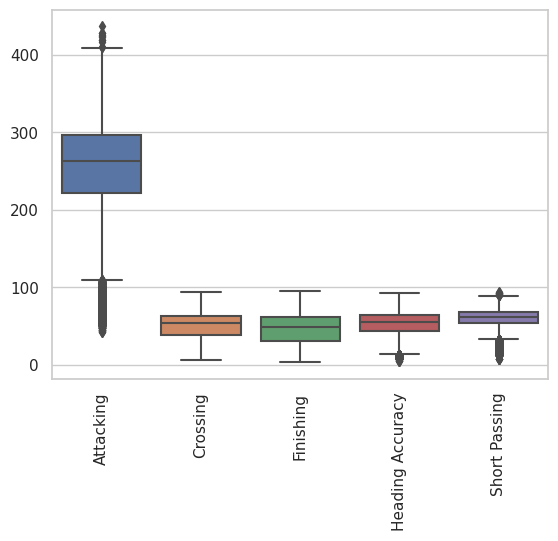

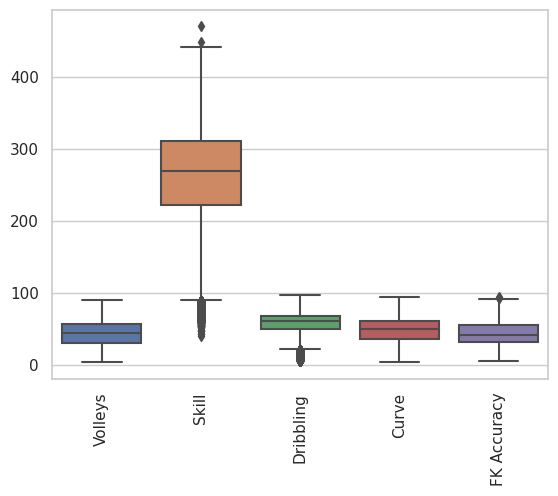

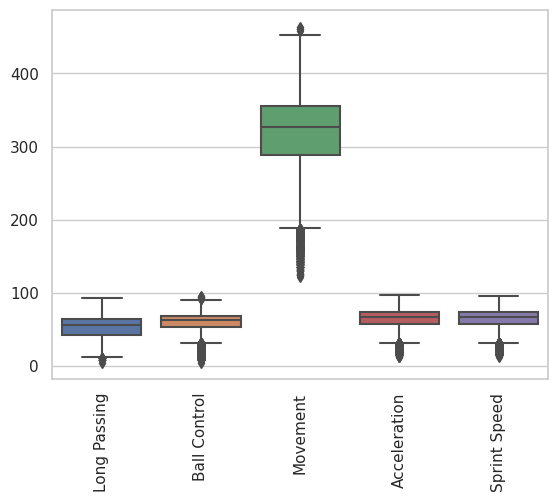

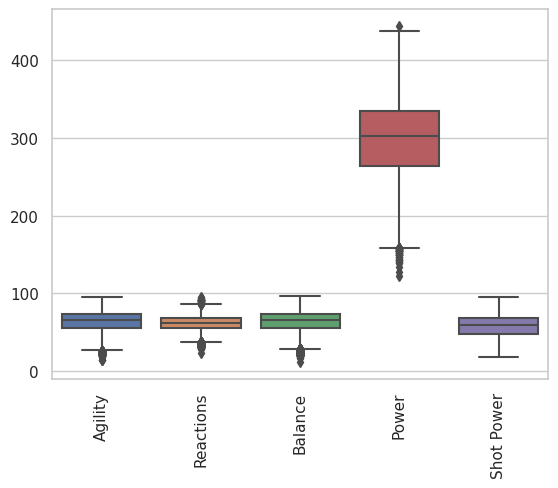

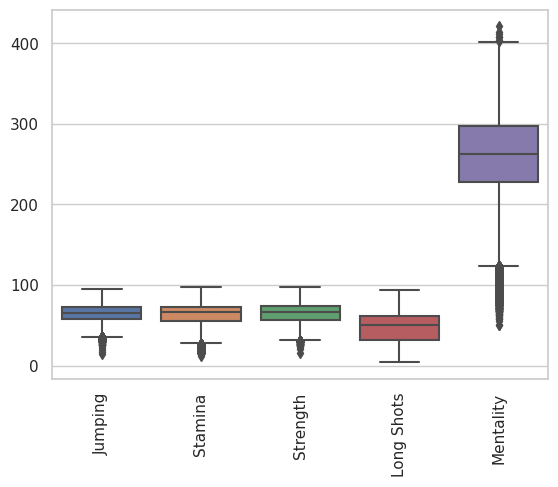

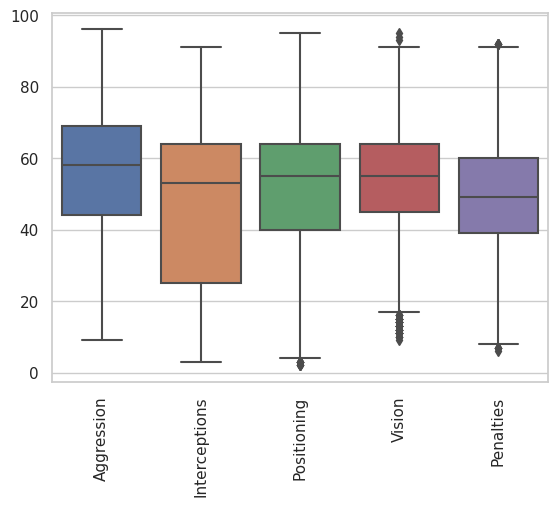

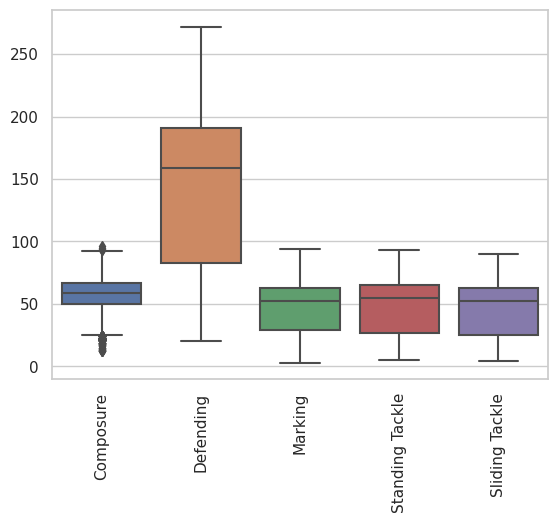

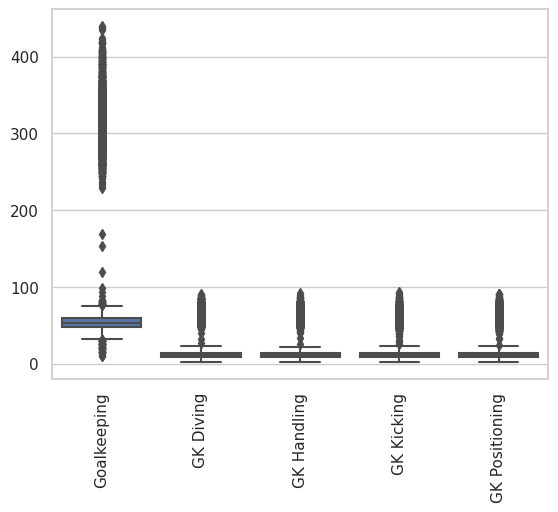

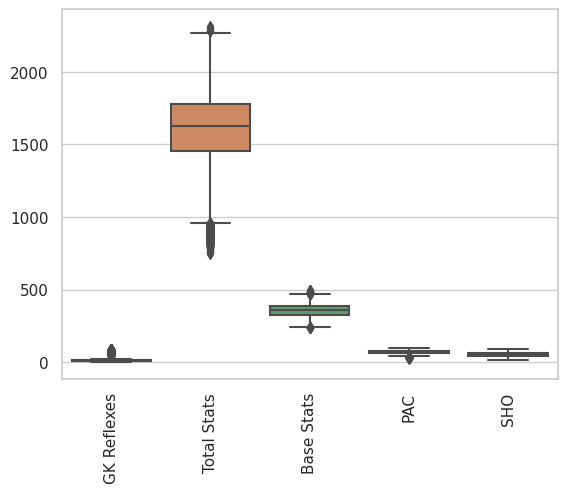

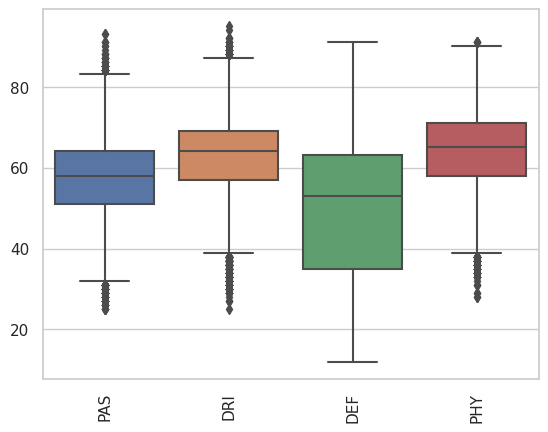

In [62]:
# Making a boxplot to show outliers in the data and the data distribution
sns.set(style="whitegrid")
for i in range(5, 55, 5):
    sns.boxplot(fifa_num.iloc[:, i:i+5])
    plt.xticks(rotation="vertical")
    plt.show()
    
# Goalkeeping skills have lots of outliers which skews the mean far from the median
# and need further analysis to understand the cause

We’ve detected outliers in our dataset that may affect the mean and related statistics. A thorough review of these points is essential to maintain the integrity of our data.

In [63]:
# sns.set(style="whitegrid")
# for i in fifa_num.columns[1:]:
#     sns.histplot(fifa_num[i])
#     plt.show()

In [64]:
# Combining the two dataframes
fifa_v2 = pd.concat([fifa_obj, fifa_num], axis=1)

# Cleaning the column names making sure its consistent and in right format
fifa_v2.columns = fifa_v2.columns.str.lower().str.replace(" ", "_")

In [65]:
fifa_v2.head()

,name,longname,photourl,playerurl,nationality,club,positions,height_cm,weight_kg,preferred_foot,best_position,joined,loan_date_end,value_eur,wage_eur,release_clause_eur,w/f,sm,a/w,d/w,ir,hits,start_contract,end_contract,contract_type,id,age,↓ova,pot,bov,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,FC Barcelona,"RW, ST, CF",170.0,72.0,Left,RW,2004-07-01,0,103500000.0,560000.0,138400000.0,4,4,Medium,Low,5,771.0,2004,2021,Contract,158023,33,93,93,93,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,85,92,91,95,38,65
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,Juventus,"ST, LW",187.0,83.0,Right,ST,2018-07-10,0,63000000.0,220000.0,75900000.0,4,5,High,Low,5,562.0,2018,2022,Contract,20801,35,92,92,92,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,89,93,81,89,35,77
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,Atlético Madrid,GK,188.0,87.0,Right,GK,2014-07-16,0,120000000.0,125000.0,159400000.0,3,1,Medium,Medium,3,150.0,2014,2023,Contract,200389,27,91,93,91,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,87,92,78,90,52,90
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,Manchester City,"CAM, CM",181.0,70.0,Right,CAM,2015-08-30,0,129000000.0,370000.0,161000000.0,5,4,High,High,4,207.0,2015,2023,Contract,192985,29,91,91,91,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,76,86,93,88,64,78
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,Paris Saint-Germain,"LW, CAM",175.0,68.0,Right,LW,2017-08-03,0,132000000.0,270000.0,166500000.0,5,5,High,Medium,5,595.0,2017,2022,Contract,190871,28,91,91,91,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,91,85,86,94,36,59


In [66]:
# Checking for duplicated values
pd.set_option("display.max_rows", None)
print(f"Duplicates count:\n{fifa_v2[fifa_v2.duplicated()==True]}")

# Checking for missing values again
print(f"\nMissing values count:\n{fifa_v2.columns[fifa_v2.isna().sum()>0]}")
pd.set_option("display.max_rows", 10)

Duplicates count:
Empty DataFrame
Columns: [name, longname, photourl, playerurl, nationality, club, positions, height_cm, weight_kg, preferred_foot, best_position, joined, loan_date_end, value_eur, wage_eur, release_clause_eur, w/f, sm, a/w, d/w, ir, hits, start_contract, end_contract, contract_type, id, age, ↓ova, pot, bov, attacking, crossing, finishing, heading_accuracy, short_passing, volleys, skill, dribbling, curve, fk_accuracy, long_passing, ball_control, movement, acceleration, sprint_speed, agility, reactions, balance, power, shot_power, jumping, stamina, strength, long_shots, mentality, aggression, interceptions, positioning, vision, penalties, composure, defending, marking, standing_tackle, sliding_tackle, goalkeeping, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes, total_stats, base_stats, pac, sho, pas, dri, def, phy]
Index: []

Missing values count:
Index([], dtype='object')


In [67]:
print(fifa_v2["hits"].median())
print(fifa_v2["hits"].mean())

4.0
22.93671953211444


The hits column is positively skewed <br>
We're going to set it to 0

In [68]:
# Finding the highest number of positions a player have
new = ""
for row in fifa_v2["positions"]:
    row_c = row.count(",")
    new_c = new.count(",")
    if row_c > new_c:
        new_c = row_c
        new = row
    else: 
        pass
print(new)
print(new_c)

RW, ST, CF
2


In [69]:
fifa_v2[["first_pos", "second_pos", "third_pos"]] = fifa_v2["positions"].str.split(",", expand = True, n=2)
fifa_v2 = fifa_v2.drop(columns="positions")

In [70]:
# Setting null values to 0
fifa_v2[["first_pos", "second_pos", "third_pos"]] = fifa_v2[["first_pos", "second_pos", "third_pos"]].fillna("0")

In [71]:
fifa_v2 = fifa_v2.drop(columns=["photourl", "playerurl"])

In [72]:
fifa_v2.select_dtypes("object").head(10)

fifa_v2.select_dtypes("int").head(10)

fifa_v2.select_dtypes("float").head(10)

,height_cm,weight_kg,value_eur,wage_eur,release_clause_eur,hits
0,170.0,72.0,103500000.0,560000.0,138400000.0,771.0
1,187.0,83.0,63000000.0,220000.0,75900000.0,562.0
2,188.0,87.0,120000000.0,125000.0,159400000.0,150.0
3,181.0,70.0,129000000.0,370000.0,161000000.0,207.0
4,175.0,68.0,132000000.0,270000.0,166500000.0,595.0
5,184.0,80.0,111000000.0,240000.0,132000000.0,248.0
6,175.0,71.0,120500000.0,250000.0,144300000.0,246.0
7,191.0,91.0,102000000.0,160000.0,120300000.0,120.0
8,178.0,73.0,185500000.0,160000.0,203100000.0,1600.0
9,187.0,85.0,110000000.0,260000.0,147700000.0,130.0


In [73]:
fifa_v2[["loan_date_end", "start_contract", "end_contract"]] = fifa_v2[["loan_date_end", "start_contract", "end_contract"]].astype(int)

In [74]:
fifa_v2.select_dtypes("integer").head(10)

,loan_date_end,w/f,sm,ir,start_contract,end_contract,id,age,↓ova,pot,bov,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
0,0,4,4,5,2004,2021,158023,33,93,93,93,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,85,92,91,95,38,65
1,0,4,5,5,2018,2022,20801,35,92,92,92,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,89,93,81,89,35,77
2,0,3,1,3,2014,2023,200389,27,91,93,91,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,87,92,78,90,52,90
3,0,5,4,4,2015,2023,192985,29,91,91,91,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,76,86,93,88,64,78
4,0,5,5,5,2017,2022,190871,28,91,91,91,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,91,85,86,94,36,59
5,0,4,4,4,2014,2023,188545,31,91,91,91,423,71,94,85,84,89,407,85,79,85,70,88,407,77,78,77,93,82,420,89,84,76,86,85,391,81,49,94,79,88,88,96,35,42,19,51,15,6,12,8,10,2195,457,78,91,78,85,43,82
6,0,3,4,3,2017,2023,209331,28,90,90,90,392,79,91,59,84,79,406,90,83,69,75,89,460,94,92,91,92,91,393,80,69,85,75,84,376,63,55,91,84,83,90,122,38,43,41,62,14,14,9,11,14,2211,470,93,86,81,90,45,75
7,0,3,1,3,2018,2024,212831,27,90,91,90,114,17,13,19,45,20,138,27,19,18,44,30,268,56,47,40,88,37,240,64,52,32,78,14,140,27,11,13,66,23,65,50,15,19,16,439,86,88,85,91,89,1389,490,86,88,85,89,51,91
8,0,4,5,3,2018,2022,231747,21,90,95,91,408,78,91,73,83,83,394,92,79,63,70,90,458,96,96,92,92,82,404,86,77,86,76,79,341,62,38,91,80,70,84,100,34,34,32,42,13,5,7,11,6,2147,466,96,86,78,91,39,76
9,0,4,1,3,2014,2022,192448,28,90,93,90,118,18,14,11,61,14,144,21,18,12,63,30,254,38,50,37,86,43,268,66,79,35,78,10,171,43,22,11,70,25,70,48,25,13,10,439,88,85,88,88,90,1442,484,88,85,88,90,45,88


In [75]:
fifa_v2.loc[fifa_v2["loan_date_end"]!=0, ["loan_date_end", "end_contract"]].value_counts()

loan_date_end  end_contract
2021           2021            882
2020           2020            113
2022           2022             17
2023           2023              1
Name: count, dtype: int64

In [76]:
fifa_v2.drop(columns="loan_date_end", inplace=True)

In [77]:
fifa_v2.select_dtypes("object").head(10)

,name,longname,nationality,club,preferred_foot,best_position,a/w,d/w,contract_type,first_pos,second_pos,third_pos
0,L. Messi,Lionel Messi,Argentina,FC Barcelona,Left,RW,Medium,Low,Contract,RW,ST,CF
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,Juventus,Right,ST,High,Low,Contract,ST,LW,0
2,J. Oblak,Jan Oblak,Slovenia,Atlético Madrid,Right,GK,Medium,Medium,Contract,GK,0,0
3,K. De Bruyne,Kevin De Bruyne,Belgium,Manchester City,Right,CAM,High,High,Contract,CAM,CM,0
4,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,Paris Saint-Germain,Right,LW,High,Medium,Contract,LW,CAM,0
5,R. Lewandowski,Robert Lewandowski,Poland,FC Bayern München,Right,ST,High,Medium,Contract,ST,0,0
6,M. Salah,Mohamed Salah,Egypt,Liverpool,Left,RW,High,Medium,Contract,RW,0,0
7,Alisson,Alisson Ramses Becker,Brazil,Liverpool,Right,GK,Medium,Medium,Contract,GK,0,0
8,K. Mbappé,Kylian Mbappé,France,Paris Saint-Germain,Right,ST,High,Low,Contract,ST,LW,RW
9,M. ter Stegen,Marc-André ter Stegen,Germany,FC Barcelona,Right,GK,Medium,Medium,Contract,GK,0,0


In [78]:
fifa_v2.select_dtypes("float").head(10)

,height_cm,weight_kg,value_eur,wage_eur,release_clause_eur,hits
0,170.0,72.0,103500000.0,560000.0,138400000.0,771.0
1,187.0,83.0,63000000.0,220000.0,75900000.0,562.0
2,188.0,87.0,120000000.0,125000.0,159400000.0,150.0
3,181.0,70.0,129000000.0,370000.0,161000000.0,207.0
4,175.0,68.0,132000000.0,270000.0,166500000.0,595.0
5,184.0,80.0,111000000.0,240000.0,132000000.0,248.0
6,175.0,71.0,120500000.0,250000.0,144300000.0,246.0
7,191.0,91.0,102000000.0,160000.0,120300000.0,120.0
8,178.0,73.0,185500000.0,160000.0,203100000.0,1600.0
9,187.0,85.0,110000000.0,260000.0,147700000.0,130.0


In [79]:
# Saving the dataframe to a csv file
fifa_v2.to_csv("/kaggle/working/fifa_v2.csv", index=False) 

# Now this data is ready for analysis